this is a monoclinic system
the reciprocal vector are:
b1= [1.04354514 0.         0.        ]
b2= [ 0.          0.84747576 -0.65052606]
b3= [0.         0.         0.91846506]


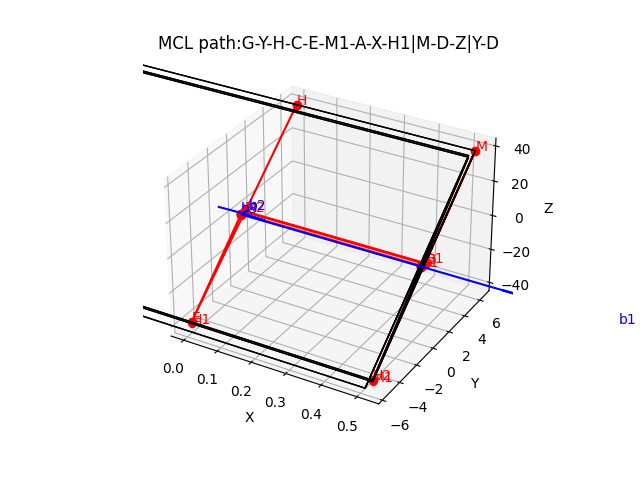

In [5]:
#计算仅针对单纯格子P，单斜m：仅需考虑截面形状  三斜：4种情况进行讨论，出现额外情况再进行讨论  直方/立方：太简单了

import os,sys,math,cmath
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d
from collections import Counter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import string

a = 8.624
b = 6.021
c = 7.414
alpha = 90  
beta = 127.51
gamma = 90
#alpha = 91.13
#beta = 112.55
#gamma = 92.43

BP1=(0,0,0)
BP2=(0,0,0)
BP3=(0,0,0)
BP4=(0,0,0)
BP5=(0,0,0)
BP6=(0,0,0)
BP7=(0,0,0)
BP8=(0,0,0)
BP9=(0,0,0)
BP10=(0,0,0)
BP11=(0,0,0)
BP12=(0,0,0)
G = (0,0,0)



if alpha == beta == gamma == 90 :
    print("this is an orthorhombic system")

    a1 = (a,0,0)
    a2 = (0,b,0)
    a3 = (0,0,c)

    b1 = 2 * np.pi * np.cross(a2, a3) / np.dot(a1, np.cross(a2, a3))
    b2 = 2 * np.pi * np.cross(a3, a1) / np.dot(a1, np.cross(a2, a3))
    b3 = 2 * np.pi * np.cross(a1, a2) / np.dot(a1, np.cross(a2, a3))

    RV = np.array([b1,b2,b3])
    x = RV[:,0]
    y = RV[:,1]
    z = RV[:,2]

    print("the reciprocal vector are:")
    print("b1=",b1)
    print("b2=",b2)
    print("b3=",b3)

    #black line FBZ 边界线
    A1 = 0.5 * (b1+b2-b3)
    A2 = 0.5 * (-b1+b2-b3)
    A3 = 0.5 * (-b1-b2-b3)
    A4 = 0.5 * (b1-b2-b3)
    B1 = 0.5 * (b1+b2+b3)
    B2 = 0.5 * (-b1+b2+b3)
    B3 = 0.5 * (-b1-b2+b3)
    B4 = 0.5 * (b1-b2+b3)
    point_FBZ = [A1,A2,A3,A4,B1,B2,B3,B4]
    vertices_FBZ = [[point_FBZ[0],point_FBZ[1],point_FBZ[2],point_FBZ[3]],
                [point_FBZ[4],point_FBZ[5],point_FBZ[6],point_FBZ[7]],
                [point_FBZ[0],point_FBZ[1],point_FBZ[5],point_FBZ[4]],
                [point_FBZ[1],point_FBZ[2],point_FBZ[6],point_FBZ[5]],
                [point_FBZ[2],point_FBZ[3],point_FBZ[7],point_FBZ[6]],
                [point_FBZ[3],point_FBZ[0],point_FBZ[4],point_FBZ[7]],]
    face_FBZ = Poly3DCollection(vertices_FBZ, edgecolors='black', linewidths=1, alpha=0)
    #red line  k-path     bule line b1 b2 b3
    X = 0.5*b1
    S = 0.5*(b1+b2)
    Y = 0.5*b2
    Z = 0.5*b3
    U = 0.5*(b1+b3)
    R = B1
    T = 0.5*(b2+b3)
    point_kpath = [G,X,S,Y,Z,U,R,T]
    letter=['G','X','S','Y','Z','U','R','T']
    vertices_kpath = [[point_kpath[0],point_kpath[1],point_kpath[2],point_kpath[3]],
                [point_kpath[4],point_kpath[5],point_kpath[6],point_kpath[7]],
                [point_kpath[0],point_kpath[1],point_kpath[5],point_kpath[4]],
                [point_kpath[1],point_kpath[2],point_kpath[6],point_kpath[5]],
                [point_kpath[2],point_kpath[3],point_kpath[7],point_kpath[6]],
                [point_kpath[3],point_kpath[0],point_kpath[4],point_kpath[7]],]
    face_kpath = Poly3DCollection(vertices_kpath, edgecolors='red', linewidths=1, alpha=0)

    
    %matplotlib widget
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for i, point in enumerate(point_kpath):
        ax.scatter(point[0], point[1], point[2], color='r')
        label = letter[i]
        ax.text(point[0], point[1], point[2], label, color='r')
    ax.set_title('oP lattice G-X-S-Y-G-Z-U-R-T-Z|Y-T|U-X|S-R')
    ax.add_collection3d(face_FBZ)
    ax.add_collection3d(face_kpath)
    ax.quiver(0, 0, 0, x, y, z, color='blue')
    ax.text(b1[0],b1[1],b1[2],'b1',color='blue')
    ax.text(b2[0],b2[1],b2[2],'b2',color='blue')
    ax.text(b3[0],b3[1],b3[2],'b3',color='blue')
    #ax.scatter(point_kpath)


    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()



elif (alpha == beta == 90) or (alpha == gamma ==90) or (beta == gamma ==90) :
    print("this is a monoclinic system")
    #ordering of the lattice a,b <= c, alpha<90, beta=gamma=90
    if alpha == 90 :
        if beta!=90 :
            alpha = beta
            beta=90
            A=b
            if c >= a :
                B = a
                C = c
            else:
                B = c
                C = a
        if gamma!=90 :
            alpha=gamma
            gamma=90
            A=c
            if b >= a :
                C = b
                B = a
            else:
                B = b
                C = a
    else :
        if b > c:
            A = a
            B = c
            C = b
        else:
            A = a
            B = b
            C = c
    if alpha>90:
        alpha=180-alpha
        coordinate_factor=-1
    else:
        coordinate_factor=1 #坐标修正系数，用于后续输出坐标时与原晶格参数对应，数值不一定是现在这样不变
    #这一变化的反向转换好像没那么简单，可以结合倒易向量的公式进行再一次的思考整理
    
    Alpha = np.radians(alpha)
    Beta = np.radians(beta)
    Gamma = np.radians(gamma)    

    a1=(A,0,0)
    a2=(0,B,0)
    a3=(0,C*np.cos(Alpha),C*np.sin(Alpha))

    b1 = 2 * np.pi * np.cross(a2, a3) / np.dot(a1, np.cross(a2, a3))
    b2 = 2 * np.pi * np.cross(a3, a1) / np.dot(a1, np.cross(a2, a3))
    b3 = 2 * np.pi * np.cross(a1, a2) / np.dot(a1, np.cross(a2, a3))

    RV = np.array([b1,b2,b3])
    x = RV[:,0]
    y = RV[:,1]
    z = RV[:,2]

    print("the reciprocal vector are:")
    print("b1=",b1)
    print("b2=",b2)
    print("b3=",b3)

    #加入判断条件， 由上述条件可得b2>b3，b2,b3的夹角大于90度
    #b2+b3与b3的夹角<90度时，为文献中的图像
    #大于90度时，为07的情况

    if np.dot(b2+b3,b3)>0: #文献对应 fig16
        n=(1-B*np.cos(Alpha/Gamma))*(2*np.sin(Alpha)**2)
        v=0.5-n*C*np.cos(Alpha/Beta)
        bp1=(-0.5,1-n,v)
        bp2=(-0.5,n,1-v)
        bp3=(-0.5,-n,v)
        bp4=(-0.5,n-1,-v)
        bp5=(-0.5,-n,v-1)
        bp6=(-0.5,n,-v)
        bp7=(0.5,1-n,v)
        bp8=(0.5,n,1-v)
        bp9=(0.5,-n,v)
        bp10=(0.5,n-1,-v)
        bp11=(0.5,-n,v-1)
        bp12=(0.5,n,-v)
        
        for i in range(0,12):
            exec("BP"+str(i+1)+"=bp"+str(i+1)+"[0]*b1+bp"+str(i+1)+"[1]*b2+bp"+str(i+1)+"[2]*b3")
        
        point_FBZ = [BP1,BP2,BP3,BP4,BP5,BP6,BP7,BP8,BP9,BP10,BP11,BP12]
        vertices_FBZ = [[point_FBZ[0],point_FBZ[1],point_FBZ[2],point_FBZ[3],point_FBZ[4],point_FBZ[5]],
                [point_FBZ[6],point_FBZ[7],point_FBZ[8],point_FBZ[9],point_FBZ[10],point_FBZ[11]],
                [point_FBZ[0],point_FBZ[1],point_FBZ[7],point_FBZ[6]],
                [point_FBZ[1],point_FBZ[2],point_FBZ[8],point_FBZ[7]],
                [point_FBZ[2],point_FBZ[3],point_FBZ[9],point_FBZ[8]],
                [point_FBZ[3],point_FBZ[4],point_FBZ[10],point_FBZ[9]],
                [point_FBZ[4],point_FBZ[5],point_FBZ[11],point_FBZ[10]],
                [point_FBZ[5],point_FBZ[0],point_FBZ[6],point_FBZ[11]]]
        face_FBZ = Poly3DCollection(vertices_FBZ, edgecolors='black', linewidths=1, alpha=0)

        a_k=(0.5,0.5,0)
        c_k=(0,0.5,0.5)
        d_k=(0.5,0,0.5)
        d1_k=(0.5,0,-0.5)
        e_k=(0.5,0.5,0.5)
        h_k=(0,n,1-v)
        h1_k=(0,1-n,v)
        h2_k=(0,n,-v)
        m_k=(0.5,n,1-v)
        m1_k=(0.5,1-n,v)
        m2_k=(0.5,n,-v)
        x_k=(0,0.5,0)
        y_k=(0,0,0.5)
        y1_k=(0,0,-0.5)
        z_k=(0.5,0,0)
        coordinate_kpath=[a_k,c_k,d_k,d1_k,e_k,h_k,h1_k,h2_k,m_k,m1_k,m2_k,x_k,y_k,y1_k,z_k]
        A_k=a_k[0]*b1+a_k[1]*b2+a_k[2]*b3
        C_k=c_k[0]*b1+c_k[1]*b2+c_k[2]*b3
        D_k=d_k[0]*b1+d_k[1]*b2+d_k[2]*b3
        D1_k=d1_k[0]*b1+d1_k[1]*b2+d1_k[2]*b3
        E_k=e_k[0]*b1+e_k[1]*b2+e_k[2]*b3
        H_k=h_k[0]*b1+h_k[1]*b2+h_k[2]*b3
        H1_k=h1_k[0]*b1+h1_k[1]*b2+h1_k[2]*b3
        H2_k=h2_k[0]*b1+h2_k[1]*b2+h2_k[2]*b3
        M_k=m_k[0]*b1+m_k[1]*b2+m_k[2]*b3
        M1_k=m1_k[0]*b1+m1_k[1]*b2+m1_k[2]*b3
        M2_k=m2_k[0]*b1+m2_k[1]*b2+m2_k[2]*b3
        X_k=x_k[0]*b1+x_k[1]*b2+x_k[2]*b3
        Y_k=y_k[0]*b1+y_k[1]*b2+y_k[2]*b3
        Y1_k=y1_k[0]*b1+y1_k[1]*b2+y1_k[2]*b3
        Z_k=z_k[0]*b1+z_k[1]*b2+z_k[2]*b3
        point_kpath=[A_k,C_k,D_k,D1_k,E_k,H_k,H1_k,H2_k,M_k,M1_k,M2_k,X_k,Y_k,Y1_k,Z_k]

        letter=['G','A','C','D','D1','E','H','H1','H2','M','M1','M2','X','Y','Y1','Z']

        point_kpath_route1=np.array([G,Y_k,H_k,C_k,E_k,M1_k,A_k,X_k,H1_k])
        point_kpath_route2=np.array([M_k,D_k,Z_k])
        point_kpath_route3=np.array([Y_k,D_k])
        x_route1=point_kpath_route1[:,0]
        y_route1=point_kpath_route1[:,1]
        z_route1=point_kpath_route1[:,2]
        x_route2=point_kpath_route2[:,0]
        y_route2=point_kpath_route2[:,1]
        z_route2=point_kpath_route2[:,2]
        x_route3=point_kpath_route3[:,0]
        y_route3=point_kpath_route3[:,1]
        z_route3=point_kpath_route3[:,2]

        %matplotlib widget
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        for i, point in enumerate(point_kpath):
            ax.scatter(point[0], point[1], point[2], color='r')
            label = letter[i]
            ax.text(point[0], point[1], point[2], label, color='r')
        ax.set_title('MCL path:G-Y-H-C-E-M1-A-X-H1|M-D-Z|Y-D')
        ax.add_collection3d(face_FBZ)
        ax.plot(x_route1,y_route1,z_route1,'ro-')
        ax.plot(x_route2,y_route2,z_route2,'ro-')
        ax.plot(x_route3,y_route3,z_route3,'ro-')
        ax.quiver(0, 0, 0, x, y, z, color='blue')
        ax.text(b1[0],b1[1],b1[2],'b1',color='blue')
        ax.text(b2[0],b2[1],b2[2],'b2',color='blue')
        ax.text(b3[0],b3[1],b3[2],'b3',color='blue')
        #ax.scatter(point_kpath)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.show()
        






else :
    print("this is a triclinic system")
    
    Alpha = np.radians(alpha)
    Beta = np.radians(beta)
    Gamma = np.radians(gamma)

    a1 = (a,0,0)
    a2 = (b * np.cos(Gamma), b * np.sin(Gamma), 0)
    a3 = (c * np.cos(Beta), c * ( np.cos(Alpha) - np.cos(Beta) * np.cos(Gamma)) / np.sin(Gamma), np.sqrt(np.sin(Gamma)**2-np.cos(Alpha)**2-np.cos(Beta)**2+2*np.cos(Alpha)*np.cos(Beta)*np.cos(Gamma))*c/np.sin(Gamma))

    b1 = 2 * np.pi * np.cross(a2, a3) / np.dot(a1, np.cross(a2, a3))
    b2 = 2 * np.pi * np.cross(a3, a1) / np.dot(a1, np.cross(a2, a3))
    b3 = 2 * np.pi * np.cross(a1, a2) / np.dot(a1, np.cross(a2, a3))

    RV = np.array([b1,b2,b3])
    x = RV[:,0]
    y = RV[:,1]
    z = RV[:,2]

    print("the reciprocal vector are:")
    print("b1=",b1)
    print("b2=",b2)
    print("b3=",b3)
